In [1]:
# imports
from GesBerry_eval import conf_matrix, clf_acc, cross_val, x_y_test, x_test

from sklearn.model_selection import train_test_split # ---- vers. scikit-learn: 0.19.1
from sklearn.ensemble import RandomForestClassifier

In [2]:
# globals
frame_size = 140 # ------------------------------------- 1.4 seconds recording window

```
# Available datasets:
# User A: 'User_A1_011017', 'User_A2_011017', 'User_A3_121017' 
# User B: 'User_B1_131017', 'User_B2_131017'
# User C: 'User_C1_071017' 
```

# (A1) - Test

1. Get labeled dataset and split it into training and validation set
2. preprocess and learn from train data; afterwards put a decision boundary function out. The decision boundary function contains the knowledge of the classifier on how to relate the data to the gestures
3. preprocess and classify the data. The preprocessing is the same as it is applied in the learning step. The labels are excluded and the classifier identifies the labels of the gestures
4. Evaluate the classification results in 3 experiments:
    - Confusion matrix
    - Accuracy score
    - k-fold crossvalidation score

<br/>

<img src="img/flowchart_A1Test_(1).png" width="600">

<br/>

For further information please check the x_test-function in the script GesBerry_eval.py

RandomForestClassifier ---> Crossval score Accuracy:  0.96 (+/- 0.16)
Accuracy of the current Train_test-split --------- :  0.8461538461538461


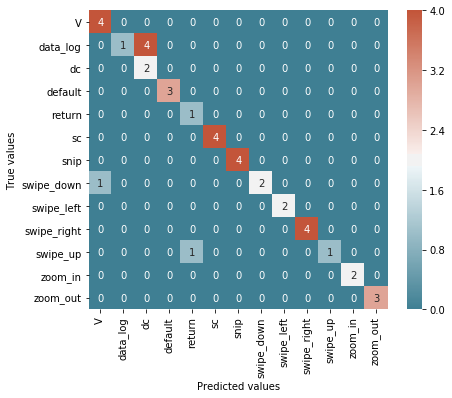

In [3]:
x_test('User_A1_011017') # A1-Test function call

-----

# (A1-A2)-Test

This is a user dependendant experiment in which User A has recorded 2 datasets. One is used for training and one for testing. Important to mention is, that the user is experienced in performing the gestures. The dataquality from an inexperienced user will be shown in the (B1-B2)-Test.

The precise algorithm goes as follows:
1. Get labeled dataset A1
2. preprocess raw dataset into features
3. learn from dataset A1
4. Get labeled dattaset A2
5. preprocess raw dataset into features
6. import decision-boundary-function (the knowledge) and predict concerning gestures of dataset A2
7. Compare the predicted gestures with the real gestures:
    - print an accuracy score
    - plot a confusion matrix

The procedure can be seen in the following flowchart:

<br/>

<img src="img/flowchart_X1_X2_test.png" width="600">

<br/>

Accuracy of the current Train_test-split --------- :  0.9923076923076923


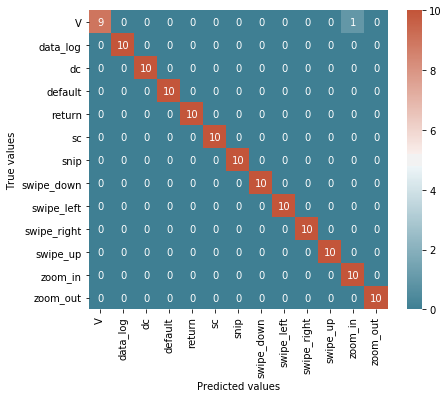

In [8]:
x_y_test('User_A1_011017', 'User_A2_011017') # User_A1, User_A2

# (B1-B2)-Test

This experiment follows the same procedure as the (A1-A2)-Test. Here the human learning gesture learning rate is shown: At
the beginning the GCI did not perform accurate predictions. That came from the users’ lack of
experience in recording consistent gesture executions. Not only must the GCI learn from the data, but also the users themselves need to learn to
perform consistent gestures. Inconsistent gesture executions lead to inconsistent data. A
classifier that is trained with inconsistent data performs biased predictions.

Accuracy of the current Train_test-split --------- :  0.8076923076923077


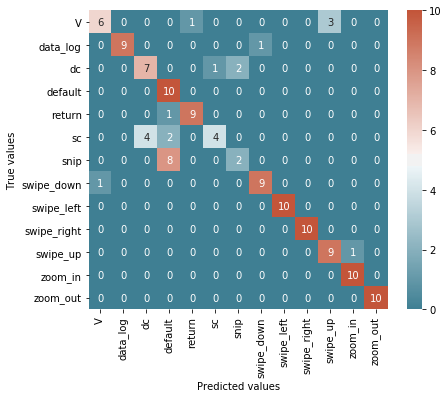

In [9]:
x_y_test('User_B1_131017', 'User_B2_131017') # User_B1, User_B2

In the beginning the inexperienced operator performs the gestures slowly and with a wide
range of arm motion. The more often a user trains the Gesture Control Interface, the smaller the variations in the
gesture executions get.

For example: An inexperienced operator records the gesture “return” several times. “return”
includes writing the letter “X” with the hand in the air. Initially it is drawn slowly and with
wide arm movements. After the 4 th or 5 th repetition (first sampling session), the user has
adapted and writes the “X” faster, with only spinning the wrist and using minor arm
movements.

The problem is: The sensor output per gesture is not consistent in this data recording session.
Here the first 4 or 5 executions differ from the subsequent ones. A classifier that is trained on
such a dataset is trained with at least 4 or 5 gestures that do not reflect the “normal” gesture
executions. Thus it later performs biased predictions

__To sum it up:__ Not only needs the Gesture Control Interface adapt to the user’s data, but also the user adapts his
gesture executions in a learning process. It takes 2 gesture-sampling sessions until the
movement patterns stagnate and the data is suitable for the Gesture Control Interface. Inexperienced users cannot
directly use the Gesture Control Interface. The proper gesture executions need to be learned first.

----

# (A1-B2)-Test

Here the classifier is trained with the data of user (A) and then applied to the gestures of user
(B). Both users are experienced. The experiment procedure is the same as in the (A1-A2)-Test
The objective of this experiment is to find out, how robust
the classifier is in performing user-independent gesture analysis.

Accuracy of the current Train_test-split --------- :  0.5076923076923077


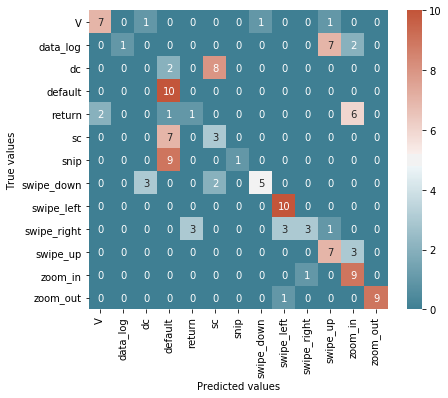

In [7]:
x_y_test('User_A1_011017', 'User_B2_131017')

The classifier is not capable to perform
reliable gesture estimations.